<a href="https://colab.research.google.com/github/lowkahhou/Sep20-RDAI-Project-Groceries-Object-Detection-with-Pretrained-RESNET50-COCO-Weights/blob/main/Project_2_Submission_Groceries_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Low Kah Hou (DSTA)

Red Dragon Module 2 Computer Vision Project Assignment 2

3-4 Sep 2020

Project Scope: Object Detection of 10 different brands of cigarettes placed on shelves

ML Model: Fine-tuned Retinanet with Pre-trained Resnet50-Coco weights 


<h1>Download Data</h1>
We use <a href="https://github.com/gulvarol/grocerydataset">Grocery Dataset</a> that contains 354 tobacco shelves images collected from ~40 locations with 4 cameras.<br>
<br>

We'll use data from two folders:
<h3>ShelfImages</h3>
Directory contains JPG files named the same way as C3_P06_N3_S3_1.JPG file:
<ul>
    <li>C3_P06 - shelf id</li>
    <li>N3_S3_1 - planogram id</li>
</ul>
<h3>ProductImagesFromShelves</h3>
Directory contains png files grouped by category named the same way as C1_P01_N1_S2_1.JPG_1008_1552_252_376.png file:
<ul>
    <li>C1_P01_N1_S2_1.JPG - shelf photo file</li>
    <li>1008 - x</li>
    <li>1552 - y</li>
    <li>252 - w</li>
    <li>376 - h</li>
</ul>

In [ ]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
import imutils
import matplotlib.image as mpimg
import keras
from keras.preprocessing.image import ImageDataGenerator
import urllib
from keras.models import Sequential
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras import backend as K


%matplotlib inline

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

import pandas as pd 
from lxml import objectify
import glob


In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 6205 (delta 1), reused 3 (delta 1), pack-reused 6196
Receiving objects: 100% (6205/6205), 14.88 MiB | 36.27 MiB/s, done.
Resolving deltas: 100% (4191/4191), done.


In [ ]:
!pip -q install --upgrade keras

In [ ]:
%cd keras-retinanet/

!pip -q install .

/content/keras-retinanet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [ ]:
os.makedirs("checkpointed", exist_ok=True)

In [ ]:
pwd

'/content/keras-retinanet'

In [ ]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
!wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part1.tar.gz
!wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz

!tar -xvzf GroceryDataset_part1.tar.gz
! tar -xvzf GroceryDataset_part2.tar.gz

Streaming output truncated to the last 5000 lines.
ProductImagesFromShelves/0/C1_P02_N2_S2_1.JPG_1088_1632_340_584.png
BrandImagesFromShelves/6/C1_P08_N3_S3_1.JPG_1904_892_216_368.png
ProductImagesFromShelves/0/C2_P06_N1_S4_1.JPG_1172_928_164_220.png
ProductImagesFromShelves/0/C4_P02_N2_S3_1.JPG_340_332_164_228.png
ProductImagesFromShelves/0/C4_P08_N1_S2_1.JPG_2556_620_244_392.png
ProductImagesFromShelves/0/C1_P08_N3_S4_2.JPG_2820_920_200_340.png
ProductImagesFromShelves/2/C4_P03_N1_S4_1.JPG_1476_656_168_240.png
BrandImagesFromShelves/2/C4_P03_N2_S3_2.JPG_332_296_192_264.png
ProductImagesFromShelves/0/C3_P07_N4_S2_1.JPG_3760_504_412_564.png
ProductImagesFromShelves/0/C1_P08_N1_S4_1.JPG_1976_1436_212_324.png
ProductImagesFromShelves/0/C3_P07_N2_S3_1.JPG_2720_1096_292_408.png
ProductImagesFromShelves/0/C3_P03_N1_S5_1.JPG_644_2140_152_276.png
ProductImagesFromShelves/0/C1_P03_N1_S2_1.JPG_2772_1120_220_320.png
ProductImagesFromShelves/0/C1_P02_N2_S4_1.JPG_464_1400_264_380.png
BrandImagesFr

In [ ]:
pwd

'/content/keras-retinanet'

In [ ]:
ROOT_PATH = '/content/keras-retinanet/'

shelf_images_folder = 'ShelfImages/'
product_images_folder = 'ProductImagesFromShelves/'

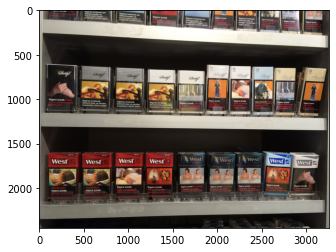

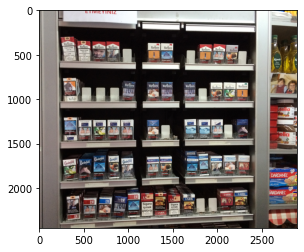

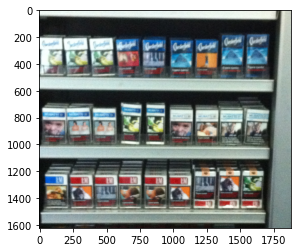

In [ ]:
# Show 3 images from ShelfImages
# This folder contains images of multiple cigarettes on the shelf

for file in os.listdir(ROOT_PATH + shelf_images_folder)[:3]:
  img = mpimg.imread(ROOT_PATH + shelf_images_folder + '//' + file)
  imgplot = plt.imshow(img)
  plt.show()

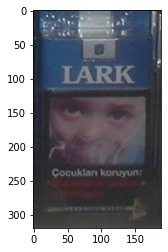

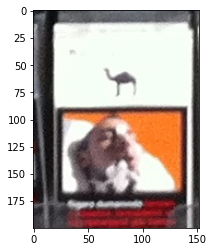

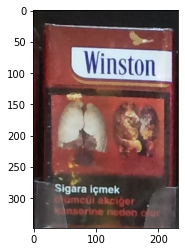

In [ ]:
# Show 3 images from ProductImagesFromShelves
# This folder contains images of individual cigarette

for file in os.listdir(ROOT_PATH + product_images_folder + '/0/')[:3]:
  img = mpimg.imread(ROOT_PATH + product_images_folder + '/0/' + file)
  imgplot = plt.imshow(img)
  plt.show()

In [ ]:
# let's get all shelves photo data from ShelfImages
jpg_files = [f for f in os.listdir(f'{shelf_images_folder}') if f.endswith('JPG')]
photos_df = pd.DataFrame([[f, f[:6], f[7:14]] for f in jpg_files], 
                         columns=['file', 'shelf_id', 'planogram_id'])
photos_df.head()

,file,shelf_id,planogram_id
0,C1_P02_N3_S2_1.JPG,C1_P02,N3_S2_1
1,C1_P11_N1_S5_1.JPG,C1_P11,N1_S5_1
2,C2_P08_N3_S3_2.JPG,C2_P08,N3_S3_2
3,C2_P09_N1_S7_1.JPG,C2_P09,N1_S7_1
4,C2_P02_N1_S3_1.JPG,C2_P02,N1_S3_1


In [ ]:
classes = {'Marlboro': 1,
           'Kent': 2,
           'Camel': 3,
           'Parliment': 4,
           'Pall Mall': 5,
           'Monte Carlo': 6,
           'Winston': 7,
           'Lucky Strike': 8,
           'Tekel 2001': 9,
           'Lark': 10}

classes

{'Camel': 3,
 'Kent': 2,
 'Lark': 10,
 'Lucky Strike': 8,
 'Marlboro': 1,
 'Monte Carlo': 6,
 'Pall Mall': 5,
 'Parliment': 4,
 'Tekel 2001': 9,
 'Winston': 7}

In [ ]:
# let's get products on shelves photo from ProductImagesFromShelves
# This dataset also contains the annotation

products_df = pd.DataFrame(
    [[f[:18], f[:6], f[7:14], i, *map(int, f[19:-4].split('_'))] 
     for i in range(11) 
     for f in os.listdir(f'{product_images_folder}{i}') if f.endswith('png')],
    columns=['image_name', 'shelf_id', 'planogram_id', 
             'class_name', 'x_min', 'y_min', 'w', 'h'])

# convert from width height to xmax, ymax
products_df['x_max'] = products_df['x_min'] + products_df['w']
products_df['y_max'] = products_df['y_min'] + products_df['h']

products_df = products_df[['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'class_name']]
products_df = products_df[products_df['class_name'] != 0]

products_df['image_name'] = shelf_images_folder + products_df['image_name']

class_list = []
for each_class in products_df['class_name']:
  for class_name, label in classes.items():
      if label == each_class:
          class_list.append(class_name)
products_df['class_name'] = class_list

products_df.reset_index(drop = True, inplace = True)
products_df.head()

,image_name,x_min,y_min,x_max,y_max,class_name
0,ShelfImages/C4_P05_N2_S2_1.JPG,936,304,1156,620,Marlboro
1,ShelfImages/C1_P11_N1_S4_1.JPG,772,148,1020,508,Marlboro
2,ShelfImages/C4_P05_N2_S3_1.JPG,708,412,928,740,Marlboro
3,ShelfImages/C1_P05_N2_S3_1.JPG,2516,928,2748,1296,Marlboro
4,ShelfImages/C1_P05_N3_S4_1.JPG,2720,136,2940,472,Marlboro


In [ ]:
products_df.class_name.value_counts()

Kent            998
Parliment       412
Winston         311
Marlboro        304
Lucky Strike    195
Monte Carlo     190
Pall Mall       114
Tekel 2001       78
Lark             75
Camel            67
Name: class_name, dtype: int64

In [ ]:
# function to display shelf photo with rectangled products
def draw_shelf_photo(image_name):
    file_products_df = products_df[products_df.image_name == image_name]
    coordinates = file_products_df[['x_min', 'y_min', 'x_max', 'y_max']].values
    im = cv2.imread(f'{shelf_images_folder}{image_name}')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)    
    for x_min, y_min, x_max, y_max in coordinates:
        cv2.rectangle(im, (x_min, y_min), (x_max, y_max), (0, 255, 0), 5)
    plt.imshow(im)

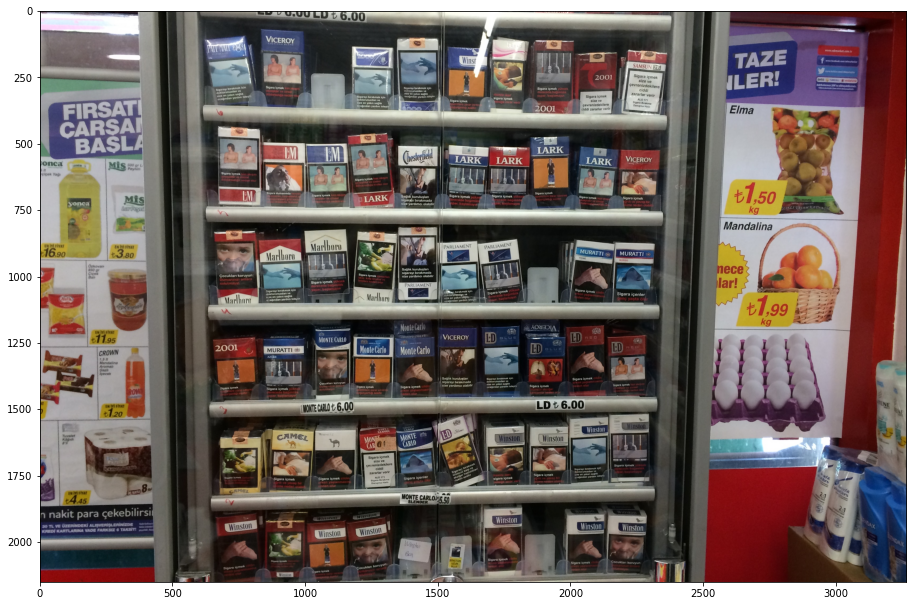

In [ ]:
# draw one photo to check our data
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('C1_P09_N2_S6_1.JPG')

In [ ]:
# split train-test data

train_df, test_df = train_test_split(
  products_df, 
  test_size=0.2, 
  random_state=42
)

In [ ]:
ANNOTATIONS_FILE = 'annotations.csv'
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)
!head annotations.csv

ShelfImages/C1_P08_N2_S3_1.JPG,672,928,924,1296,Winston
ShelfImages/C1_P12_N4_S3_1.JPG,1744,340,2016,824,Parliment
ShelfImages/C4_P02_N2_S4_1.JPG,972,620,1112,836,Winston
ShelfImages/C1_P11_N2_S3_2.JPG,400,892,636,1236,Parliment
ShelfImages/C3_P03_N3_S2_1.JPG,1136,544,1452,984,Pall Mall
ShelfImages/C4_P08_N1_S3_1.JPG,1484,1016,1708,1328,Kent
ShelfImages/C2_P04_N1_S3_1.JPG,1032,1104,1184,1336,Marlboro
ShelfImages/C1_P03_N1_S3_1.JPG,1412,1008,1592,1252,Winston
ShelfImages/C3_P02_N2_S4_1.JPG,1740,1504,1944,1796,Lucky Strike
ShelfImages/C3_P07_N1_S6_1.JPG,856,780,1032,1028,Kent


In [ ]:
CLASSES_FILE = 'classes.csv'

with open(CLASSES_FILE, 'w') as f:
  for each_class in classes:
    f.write('{},{}\n'.format(each_class,classes[each_class]))

!cat classes.csv

Marlboro,1
Kent,2
Camel,3
Parliment,4
Pall Mall,5
Monte Carlo,6
Winston,7
Lucky Strike,8
Tekel 2001,9
Lark,10


# Training with the pretrained model

In [ ]:
PRETRAINED_MODEL = './checkpointed/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./checkpointed/_pretrained_model.h5


In [ ]:
batch_size = 8
steps = len(train_df)/batch_size

STEPS = int(steps)
STEPS

274

In [ ]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 3 --steps 100 --epochs 5 csv annotations.csv classes.csv

2020-11-27 01:00:48.672442: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
2020-11-27 01:00:50.421803: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-27 01:00:50.485983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-27 01:00:50.486608: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-11-27 01:00:50.486662: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-27 01:00:50.697004: I t

In [ ]:
ls

annotations.csv          GroceryDataset_part1.tar.gz  requirements.txt
BrandImages/             GroceryDataset_part2.tar.gz  setup.cfg
BrandImagesFromShelves/  images/                      setup.py
build/                   keras_retinanet/             ShelfImages/
checkpointed/            LICENSE                      snapshots/
classes.csv              ProductImages/               tests/
CONTRIBUTORS.md          ProductImagesFromShelves/
examples/                README.md


# Loading the trained model

In [ ]:
ls

annotations.csv          GroceryDataset_part1.tar.gz  requirements.txt
BrandImages/             GroceryDataset_part2.tar.gz  setup.cfg
BrandImagesFromShelves/  images/                      setup.py
build/                   keras_retinanet/             ShelfImages/
checkpointed/            LICENSE                      snapshots/
classes.csv              ProductImages/               tests/
CONTRIBUTORS.md          ProductImagesFromShelves/
examples/                README.md


In [ ]:
!ls snapshots

resnet50_csv_01.h5


In [ ]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_01.h5


# Predictions

In [ ]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [ ]:
THRES_SCORE = 0.6

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)


In [ ]:
def show_detected_objects(image_row):
  img_path = image_row.image_name
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  true_box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]
  draw_box(draw, true_box, thickness = 40, color=(255, 255, 0))

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

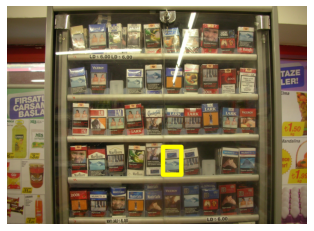

In [ ]:
show_detected_objects(test_df.iloc[1])

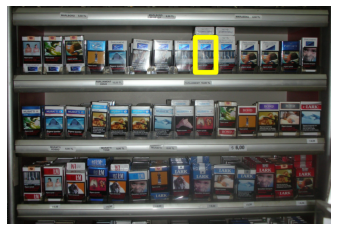

In [ ]:
show_detected_objects(test_df.iloc[44])